# Content and Objectives

- Illustrate time-hopping
- Show effects of time-hopping for OOK and PPM
- Show exemplary signals
- Depict their spectrum 

- **NOTE:** In all simulations, pulse length (and, thus, bandwidth) is constant; this reduces the data rate when applying time-hopping

# Import

In [1]:
# importing
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib


In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=False)

matplotlib.rc('figure', figsize=(18, 8) )

# showing figures inline
%matplotlib inline

In [3]:
# set parameter for all schemes
T_pulse = 1

# samples-per-smbol
n_spp = 16 

# time vector per pulse
t_per_pulse = np.linspace( 0, T_pulse, n_spp )
t_sample =T_pulse / n_spp

# parameters of the RRC filter
# design is chosen such that interval length equals 6 sigma
sigma2 = ( T_pulse / 6. )**2
gaussian_pulse = np.exp( - ( t_per_pulse - T_pulse/2 )**2 / 2 / sigma2 )

# number of symbols within the signal
n_symb = 1000

# number of symbols shown in the time signal
n_shown = 10

In [4]:
# sample random bits 
b = np.random.randint( 2, size=n_symb )
print( 'b = ', b[ : n_shown ] )

# sample TH sequence
# parameters for time-hopping
n_TH = 8

c_TH = np.random.randint( n_TH, size = n_symb,  dtype=int )
print( 'c_TH = ', c_TH[: n_shown ] )

b =  [1 1 0 1 0 0 0 1 1 0]
c_TH =  [1 4 5 6 3 4 2 5 4 5]


# OOK

+ Apply time-hopping to OOK
+ Shows signal and spectrum of TH-OOK (on-off keying) 
+ Herein, binary 1 is represented as a pulse, whereas binary 0 results in no signal being transmitted

In [5]:
# adapt symbol time
T = n_TH * T_pulse

# adapt sample number to time-hopping
n_sps_OOK = n_spp * n_TH

# total time for all n_symb symbols
t_OOK_TH_total = np.linspace( 0, ( n_symb + 1 ) * T, n_sps_OOK * n_symb )

In [6]:
# construct Tx signal by pasting the pulse in the "1"-intervals
# NOTE: including TH this is simpler; you may implement the filter approach if you like to 

# init all-zero array for inserting the pulse shape
s_OOK_TH_copy_paste = np.zeros( n_symb * n_sps_OOK )

for _n in range( n_symb ):
    current_index = _n * n_sps_OOK + c_TH[ _n ] * n_spp
    s_OOK_TH_copy_paste[  current_index : current_index + n_spp  ] += b[ _n ] * gaussian_pulse 

<Figure size 1800x800 with 0 Axes>

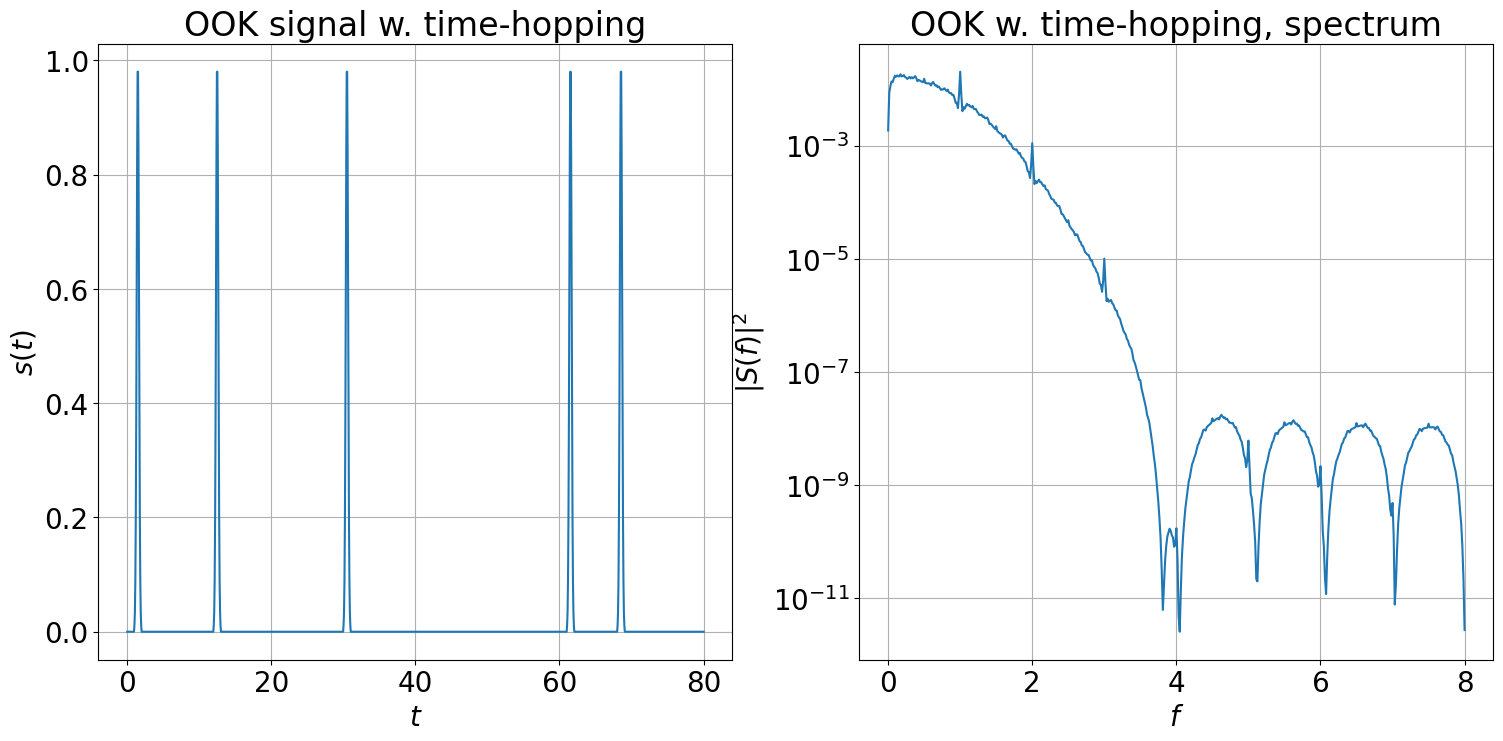

In [7]:
plt.figure()

fig, axs = plt.subplots(1, 2)

ax = plt.subplot(121)
plt.plot( t_OOK_TH_total[ : n_shown * n_sps_OOK  ], s_OOK_TH_copy_paste[ : n_shown * n_sps_OOK  ] )
plt.xlabel('$t$'); plt.ylabel('$s(t)$')
plt.grid(1); plt.title('OOK signal w. time-hopping')

ax = plt.subplot(122)

f_OOK_TH, S_OOK_TH = signal.welch( s_OOK_TH_copy_paste, 1/t_sample, nperseg=1024 ) 
plt.semilogy( f_OOK_TH, S_OOK_TH, label='OOK w. time-hopping' )

plt.xlabel('$f$'); plt.ylabel('$|S(f)|^2$')
plt.grid(1); plt.title('OOK w. time-hopping, spectrum')
plt.show()

# PPM 

+ Shows signal and spectrum of PPM (Pulse-position modulation)
+ Information is represented in the position of the pulse, a binary 0 meaning that pulse is not shifted, binary 1 resultig in puse shift

In [8]:
# number of PPM indices, log2 of which corresponds to bits
M_PPM = 2

# duration of pulse and symbol
T = T_pulse * M_PPM * n_TH

# samples per symbol scaling with position modulation
n_sps_PPM = n_spp * M_PPM * n_TH

# total time for all n_symb symbols
t_PPM_TH_total = np.linspace( 0, ( n_symb + 1 ) * T, n_sps_PPM * n_symb )

In [9]:
# bits are not resampled, but reused from OOK

# Double length array for storing double the amount of bits
bits_padded = np.zeros(2 * len(b), dtype=int)  

# indices that will be set to "1"
# NOTE: first operation yields =0 mod 2 points/indices
# if 1 is transmitted, shift by 1 has to be done 
indices = 2 * np.arange( len( b ) ) + b 

# padd 1 at the according position
bits_padded[ indices ] = 1 


In [10]:
# construct Tx signal by pasting the pulse in the "1"-intervals
# NOTE: including TH this is simpler; you may implement the filter approach if you like to 

# init all-zero array for inserting the pulse shape
s_PPM_TH_copy_paste = np.zeros( n_symb * n_sps_PPM )

for _n in range( n_symb ):
    current_index = _n * n_sps_PPM + c_TH[ _n ] * n_spp
    
    # shift index if "1" is to be transmitted
    current_index += b[ _n ] * n_spp

    s_PPM_TH_copy_paste[  current_index : current_index + n_spp  ] += gaussian_pulse 

<Figure size 1800x800 with 0 Axes>

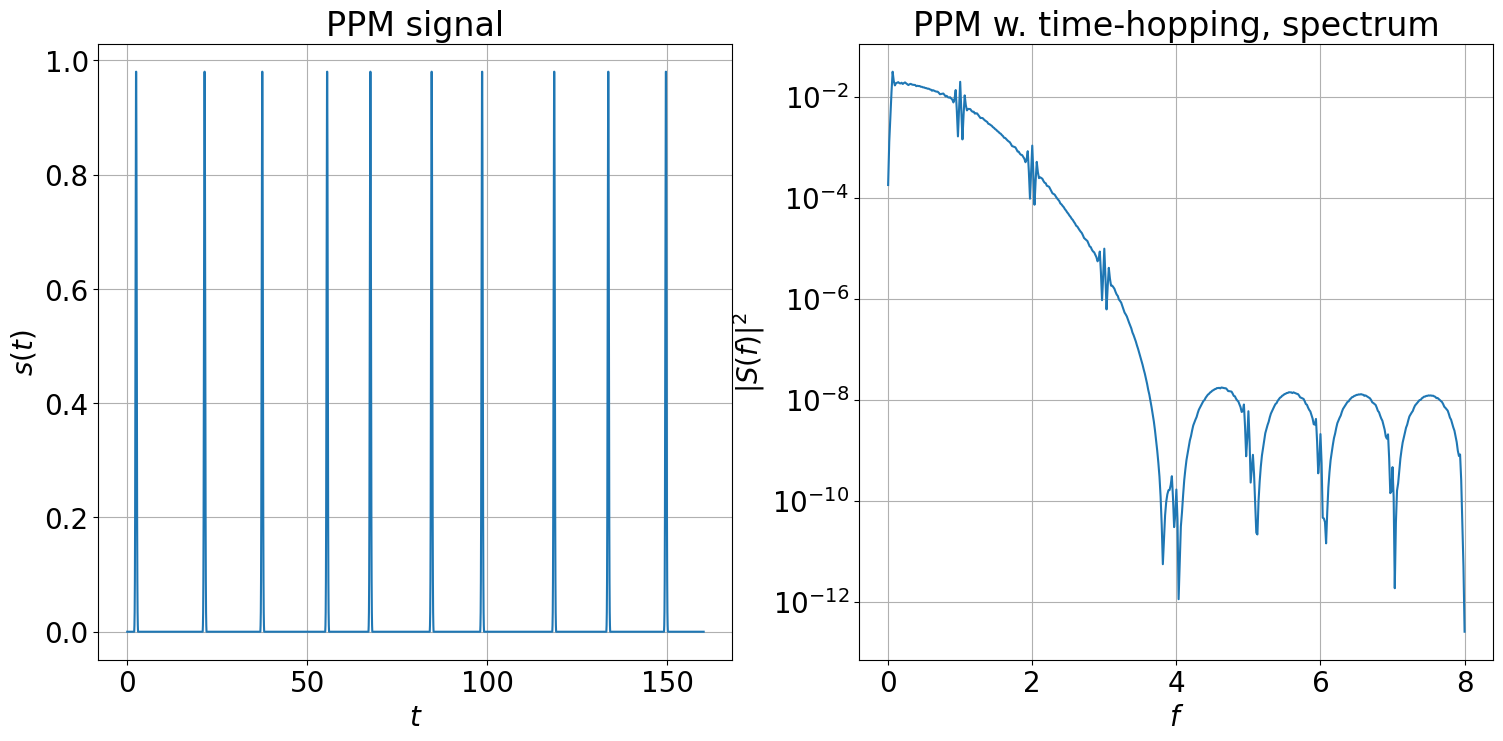

In [11]:
plt.figure()
fig, axs = plt.subplots(1, 2)

ax = plt.subplot(121)
plt.plot( t_PPM_TH_total[ : n_shown * n_sps_PPM ], s_PPM_TH_copy_paste[ : n_shown * n_sps_PPM ] )
plt.xlabel('$t$'); plt.ylabel('$s(t)$')
plt.grid(1); plt.title('PPM signal')

ax = plt.subplot(122)

f_PPM_TH, S_PPM_TH = signal.welch( s_PPM_TH_copy_paste, 1/t_sample, nperseg=1024 ) 
plt.semilogy( f_PPM_TH, S_PPM_TH, label='PPM w. time-hopping' )

plt.xlabel('$f$'); plt.ylabel('$|S(f)|^2$')
plt.grid(1); plt.title('PPM w. time-hopping, spectrum')
plt.show()

# Now compare the spectra

<Figure size 1800x800 with 0 Axes>

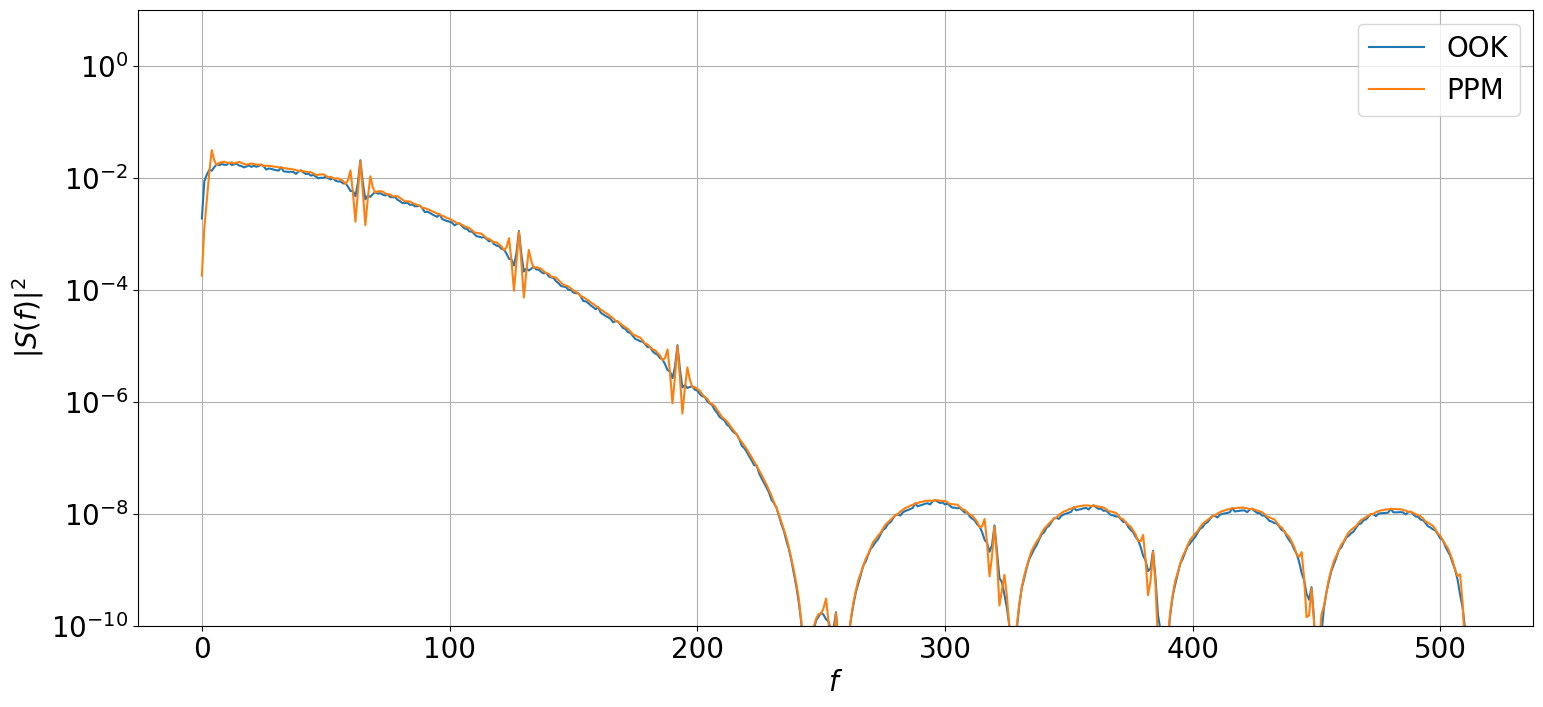

In [12]:
plt.figure()
fig, axs = plt.subplots(1, 1)


f_OOK, S_OOK_TH = signal.welch( s_OOK_TH_copy_paste, 1/t_sample, nperseg=1024 ) 
plt.semilogy( S_OOK_TH, label='OOK' )

f_PPM, S_PPM_TH = signal.welch( s_PPM_TH_copy_paste, 1/t_sample, nperseg=1024 ) 
plt.semilogy( S_PPM_TH, label='PPM' )


plt.xlabel('$f$'); plt.ylabel('$|S(f)|^2$')
plt.grid(1)
plt.ylim( (1e-10, 10))
plt.legend()

plt.show()